In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('seattle-weather.csv')

In [3]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
mean=df.select_dtypes(include='number').mean()
df.fillna(mean,inplace=True)

In [6]:
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [7]:
df.tail(10)

,date,precipitation,temp_max,temp_min,wind,weather
1451,2015-12-22,4.6,7.8,2.8,5.0,rain
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain
1454,2015-12-25,5.8,5.0,2.2,1.5,rain
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [8]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [9]:
cdf=df[['precipitation','temp_max','temp_min','wind']]

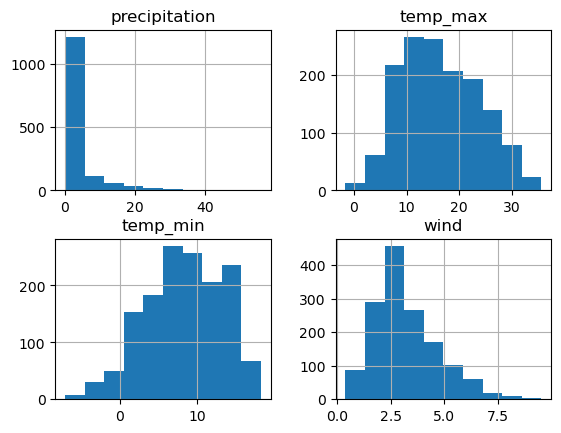

In [10]:
cdf.hist()
plt.show()


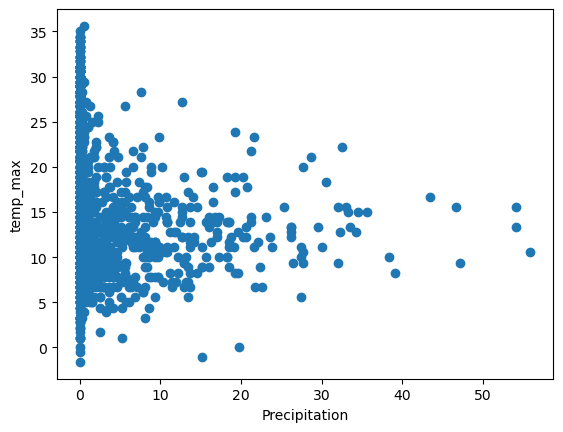

In [11]:
plt.scatter(cdf['precipitation'], cdf['temp_max'])
plt.xlabel("Precipitation")
plt.ylabel("temp_max")
plt.show()

In [12]:
X=df.drop(columns=['date','weather'])
y=df['weather']

In [13]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [14]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [17]:
X_train

,precipitation,temp_max,temp_min,wind
1452,6.1,5.0,2.8,7.6
762,2.0,7.8,2.8,0.8
932,0.0,23.9,13.3,2.2
435,1.3,10.6,6.1,1.1
629,0.0,21.1,13.3,2.5
...,...,...,...,...
1130,8.4,10.6,4.4,1.7
1294,0.0,33.3,17.8,3.4
860,0.5,15.6,7.2,2.1
1459,0.0,5.6,-1.0,3.4


In [18]:
X_test

,precipitation,temp_max,temp_min,wind
892,0.0,23.9,11.1,2.7
1105,5.8,7.8,6.1,0.5
413,0.0,9.4,4.4,3.4
522,0.0,26.7,12.2,2.5
1036,1.8,13.3,7.2,2.9
...,...,...,...,...
323,54.1,13.3,8.3,6.0
650,1.0,14.4,8.9,2.2
439,0.0,14.4,8.9,4.3
798,4.3,15.0,9.4,4.3


In [19]:
from  sklearn.linear_model import LogisticRegression

In [20]:
model= LogisticRegression()

In [21]:
model.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)

[[-1.25828607  0.12039462 -0.03022245 -0.28205443]
 [-1.84444864  0.08846771  0.04630006 -0.11844379]
 [ 3.76543284 -0.04243735  0.1969363   0.02153841]
 [ 3.84610596 -0.37501952 -0.13298995  0.1961453 ]
 [-4.50880409  0.20859455 -0.08002396  0.18281451]]
[-0.11949589 -0.02210226  0.31857343 -0.12987429 -0.047101  ]


c:\Users\HAI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
prediction=model.predict(X_test)

In [23]:
prediction

array(['sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'snow', 'rain', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun',
       'sun', 'sun', 'sun', 'rain', 'rain', 

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        14
         fog       0.00      0.00      0.00        32
        rain       0.96      0.92      0.94       192
        snow       1.00      0.12      0.22         8
         sun       0.76      1.00      0.86       193

    accuracy                           0.85       439
   macro avg       0.54      0.41      0.41       439
weighted avg       0.77      0.85      0.80       439



c:\Users\HAI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HAI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HAI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
test_weather={
    'precipitation': 10,
    'temp_max' :40,
    'temp_min':10,
    'wind':5.4
}
test_df=pd.DataFrame([test_weather])

In [27]:
test_df

,precipitation,temp_max,temp_min,wind
0,10,40,10,5.4


In [28]:
model.predict(test_df)

array(['rain'], dtype=object)

In [29]:
import pickle
with open('model.pkl','wb') as file:
 pickle.dump(model,file)

In [30]:
import pickle
mod=pickle.load(open('model.pkl','rb'))
print(model.predict([[0, 10, 40, 10]]))

['rain']


c:\Users\HAI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
